In [2]:
from sklearn.datasets import load_digits
digits=load_digits()
digits.images.shape

(1797, 8, 8)

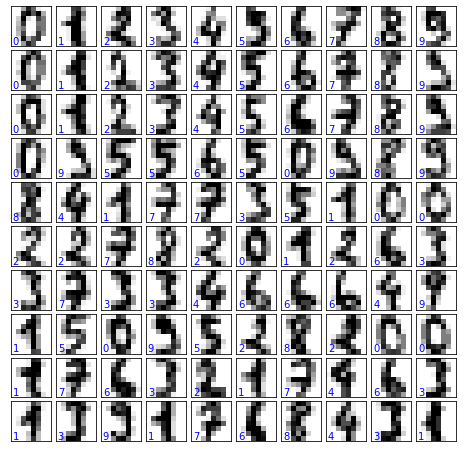

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes=plt.subplots(nrows=10,ncols=10,figsize=(8,8),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))

for i,ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary',interpolation='nearest')
    ax.text(x=0.05,y=0.05,s=str(digits.target[i]),transform=ax.transAxes,color='blue')

In [4]:
X=digits.data
X.shape

(1797, 64)

In [5]:
y=digits.target
y.shape

(1797,)

In [7]:
#Dimensionality reduction (Will visualize our points in 2D space)


from sklearn.manifold import Isomap
iso=Isomap(n_components=2)
iso.fit(digits.data)
data_projected=iso.transform(digits.data)
data_projected.shape

(1797, 2)

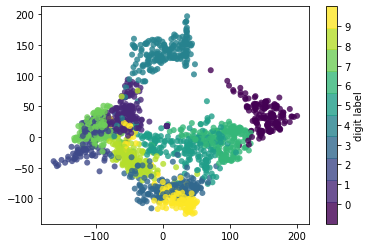

In [19]:
plt.scatter(data_projected[:,0],data_projected[:,1],c=digits.target,edgecolor='none',alpha=0.8,cmap=plt.cm.get_cmap('viridis',10))

plt.colorbar(label='digit label',ticks=range(10))
plt.clim(-1,10)

In [24]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,random_state=0)


from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(Xtrain,ytrain)
y_model=model.predict(Xtest)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_model)

0.8333333333333334

Text(79.60000000000001, 0.5, 'True value')

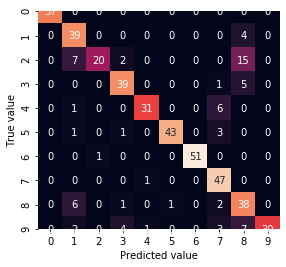

In [35]:
from sklearn.metrics import confusion_matrix

mat=confusion_matrix(ytest,y_model)
sns.heatmap(mat,square=True,annot=True,cbar=False)
plt.xlabel('Predicted value')
plt.ylabel('True value')

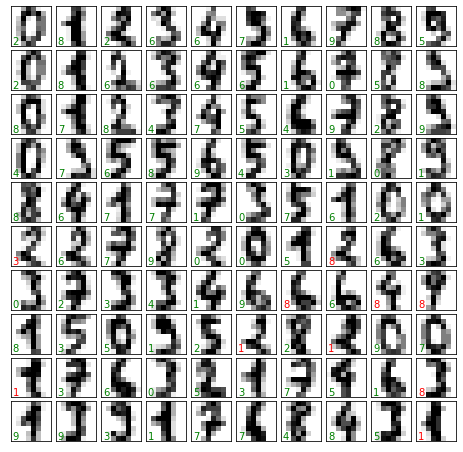

In [28]:
fig,axes=plt.subplots(nrows=10,ncols=10,figsize=(8,8),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))

for i,ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05,s=str(y_model[i]),transform=ax.transAxes,color='green' if (ytest[i]==y_model[i]) else 'red')